In [56]:
import SimpleITK as sitk
import numpy
import scipy.ndimage
import os 
import glob
import re
import theano
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
trainingALocation = '/Users/gattia/Data/mri/ski10Dataset/TrainingData-A/'
imagePrefix = 'image-'
labelPrefix = 'labels-'

In [17]:
os.chdir(trainingALocation) 
listImages = glob.glob(labelPrefix + '*.mhd')
listImageNumbers = []
for image in listImages:
    step1 = str(re.sub(labelPrefix + '-', '', image))
    listImageNumbers.append(str(re.sub('.mhd', '', step1)))

In [19]:
allImages = {}
allLabels = {}
for examID in listImageNumbers:
    imageName = imagePrefix + examID + '.mhd'
    labelName = labelPrefix + examID + '.mhd'
    
    allImages[examID] = sitk.ReadImage(imageName)
    allLabels[examID] = sitk.ReadImage(labelName)


In [26]:
def sitk_show(img, colorMap='gray', title=None, margin=0.05, dpi=40 ):
  nda = sitk.GetArrayFromImage(img)
  spacing = img.GetSpacing()
  figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
  extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
  fig = plt.figure(figsize=figsize, dpi=dpi)
  ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
  
  plt.set_cmap(colorMap)
  ax.imshow(nda,extent=extent,interpolation=None)
  if title:
    plt.title(title)
  plt.show()

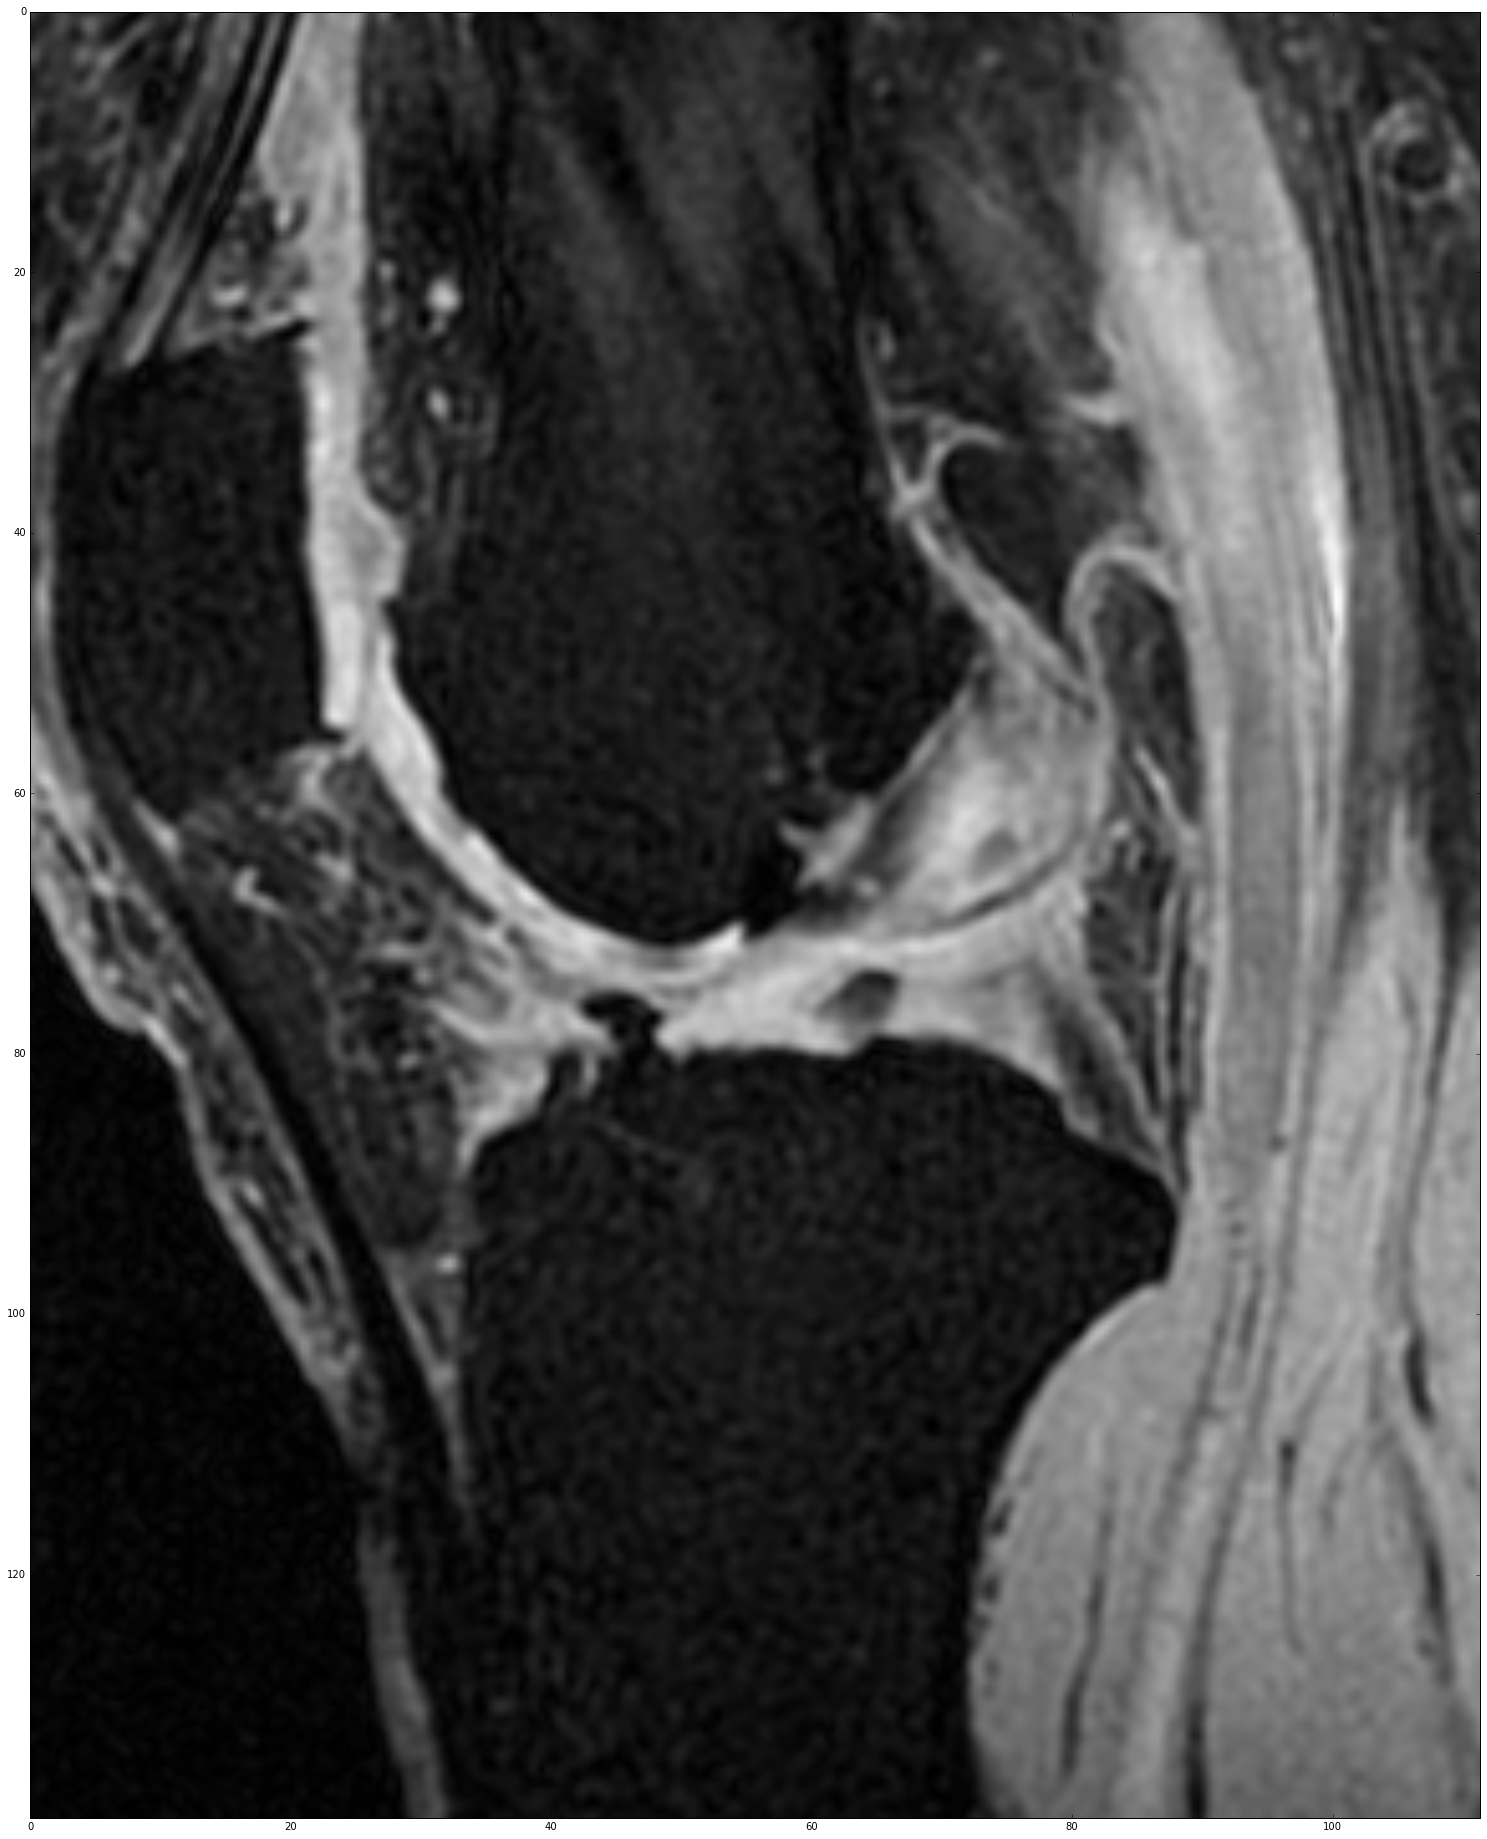

In [57]:
img = allImages[listImageNumbers[10]][:,:,50]
margin=0.1
dpi=10
colorMap='gray'
nda = sitk.GetArrayFromImage(img)
spacing = img.GetSpacing()
figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
fig = plt.figure(figsize=figsize, dpi=dpi)
ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

plt.set_cmap(colorMap)
ax.imshow(nda,extent=extent,interpolation=None)
plt.show()

In [34]:
nda.shape

(108, 355, 285)